##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">DSCI 631: Applied Machine Learning</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<h4> </h4>


<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR TEAM MEMBERS' NAMES BELOW</h3>
### TEAM MEMBERS:

### A. Assignment Overview
This assignment provides the opportunity for you to practice with various skills in unsupervised learning, and convolution neural network

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59 pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Academic Honesty

Each student is required to submit the Academic Honesty Form at the beginning of the term to cover all the deliverables (for example: assignments, projects, quizzes). Each piece of work must be original. That means, individual quizzes must be done individually without discussing and collaborating with anybody else. Team assignments must be written and programmed by your own team members. No team should copy any piece of work from other teams. The Drexel University Academic Honesty Rules and Procedures (as stated in the student handbook) will be adhered to strictly.  

### G. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles.

For programming questions, 10% of the mark will be judged on the coding style.

The following is a set of guidelines for the coding style in this course:
1. Write a good comment.
2. Use appropriate indentations to indicate control flows and blocks of code.
3. When breaking up a long line, break it before an operator, not after.

### H. Answer the following questions:
**Your answer should be combined with code and brief text answer.** Please ensure that your Jupyter notebook does not have too much spurious output. If you like, you can share your notebook in progress with me on Kaggle: leiwangv (lw474@drexel.edu)

### Data for part 1 in this assignment:
* URL: https://www.kaggle.com/datasets/abdelazizsami/cdc-diabetes-health-indicators?select=diabetes_binary_health_indicators_BRFSS2015.csv [only dataset to look into: diabetes_binary_health_indicators_BRFSS2015.csv]

* In this assignment, you should work without the ground truth labels as much as possible. Often inspecting and visualizing the data is the only way to understand the result of clustering and outlier detection.
* For Questions 1-2 visualization, you should look at the plots before making use of the ground truth labels first, then use the ground truth labels (`Diabetes_binary`) to color the points in your plots.

#### Question 1-1:
Create plots to visualize the distribution of all features (both jointly and for each class). Describe your observation.

Then visualize the data using PCA (top two principal components). Make another plot of explained variance (%) in PCA. Discuss what would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data?

In [1]:
#!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelazizsami/cdc-diabetes-health-indicators")

print("Path to dataset files:", path)

Path to dataset files: /Users/riccimason99/.cache/kagglehub/datasets/abdelazizsami/cdc-diabetes-health-indicators/versions/1


In [2]:
import pandas as pd
import numpy as np
import os

# The downloaded folder contains multiple CSV files
# We need: diabetes_binary_health_indicators_BRFSS2015.csv
csv_file = os.path.join(path, 'diabetes_binary_health_indicators_BRFSS2015.csv')

# Load the data
df = pd.read_csv(csv_file)

# Display basic info
print(f"Shape: {df.shape}")
print(f"\nHead:")
print(df.head())

print("Info:")
print(df.info())

print("Class distribution:")
print(df['Diabetes_binary'].value_counts())

Shape: (253680, 22)

Head:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      1

Dataset is deffinitly not-balanced but no missing values for any columbs 

In [3]:
# Separate features and target
X = df.drop('Diabetes_binary', axis=1)  # Features only
y = df['Diabetes_binary']  # Target

print(f"Features shape: {X.shape}")  # (253680, 21)
print(f"Target shape: {y.shape}")    # (253680,)
print(f"\nFeature names:")
print(X.columns.tolist())

Features shape: (253680, 21)
Target shape: (253680,)

Feature names:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


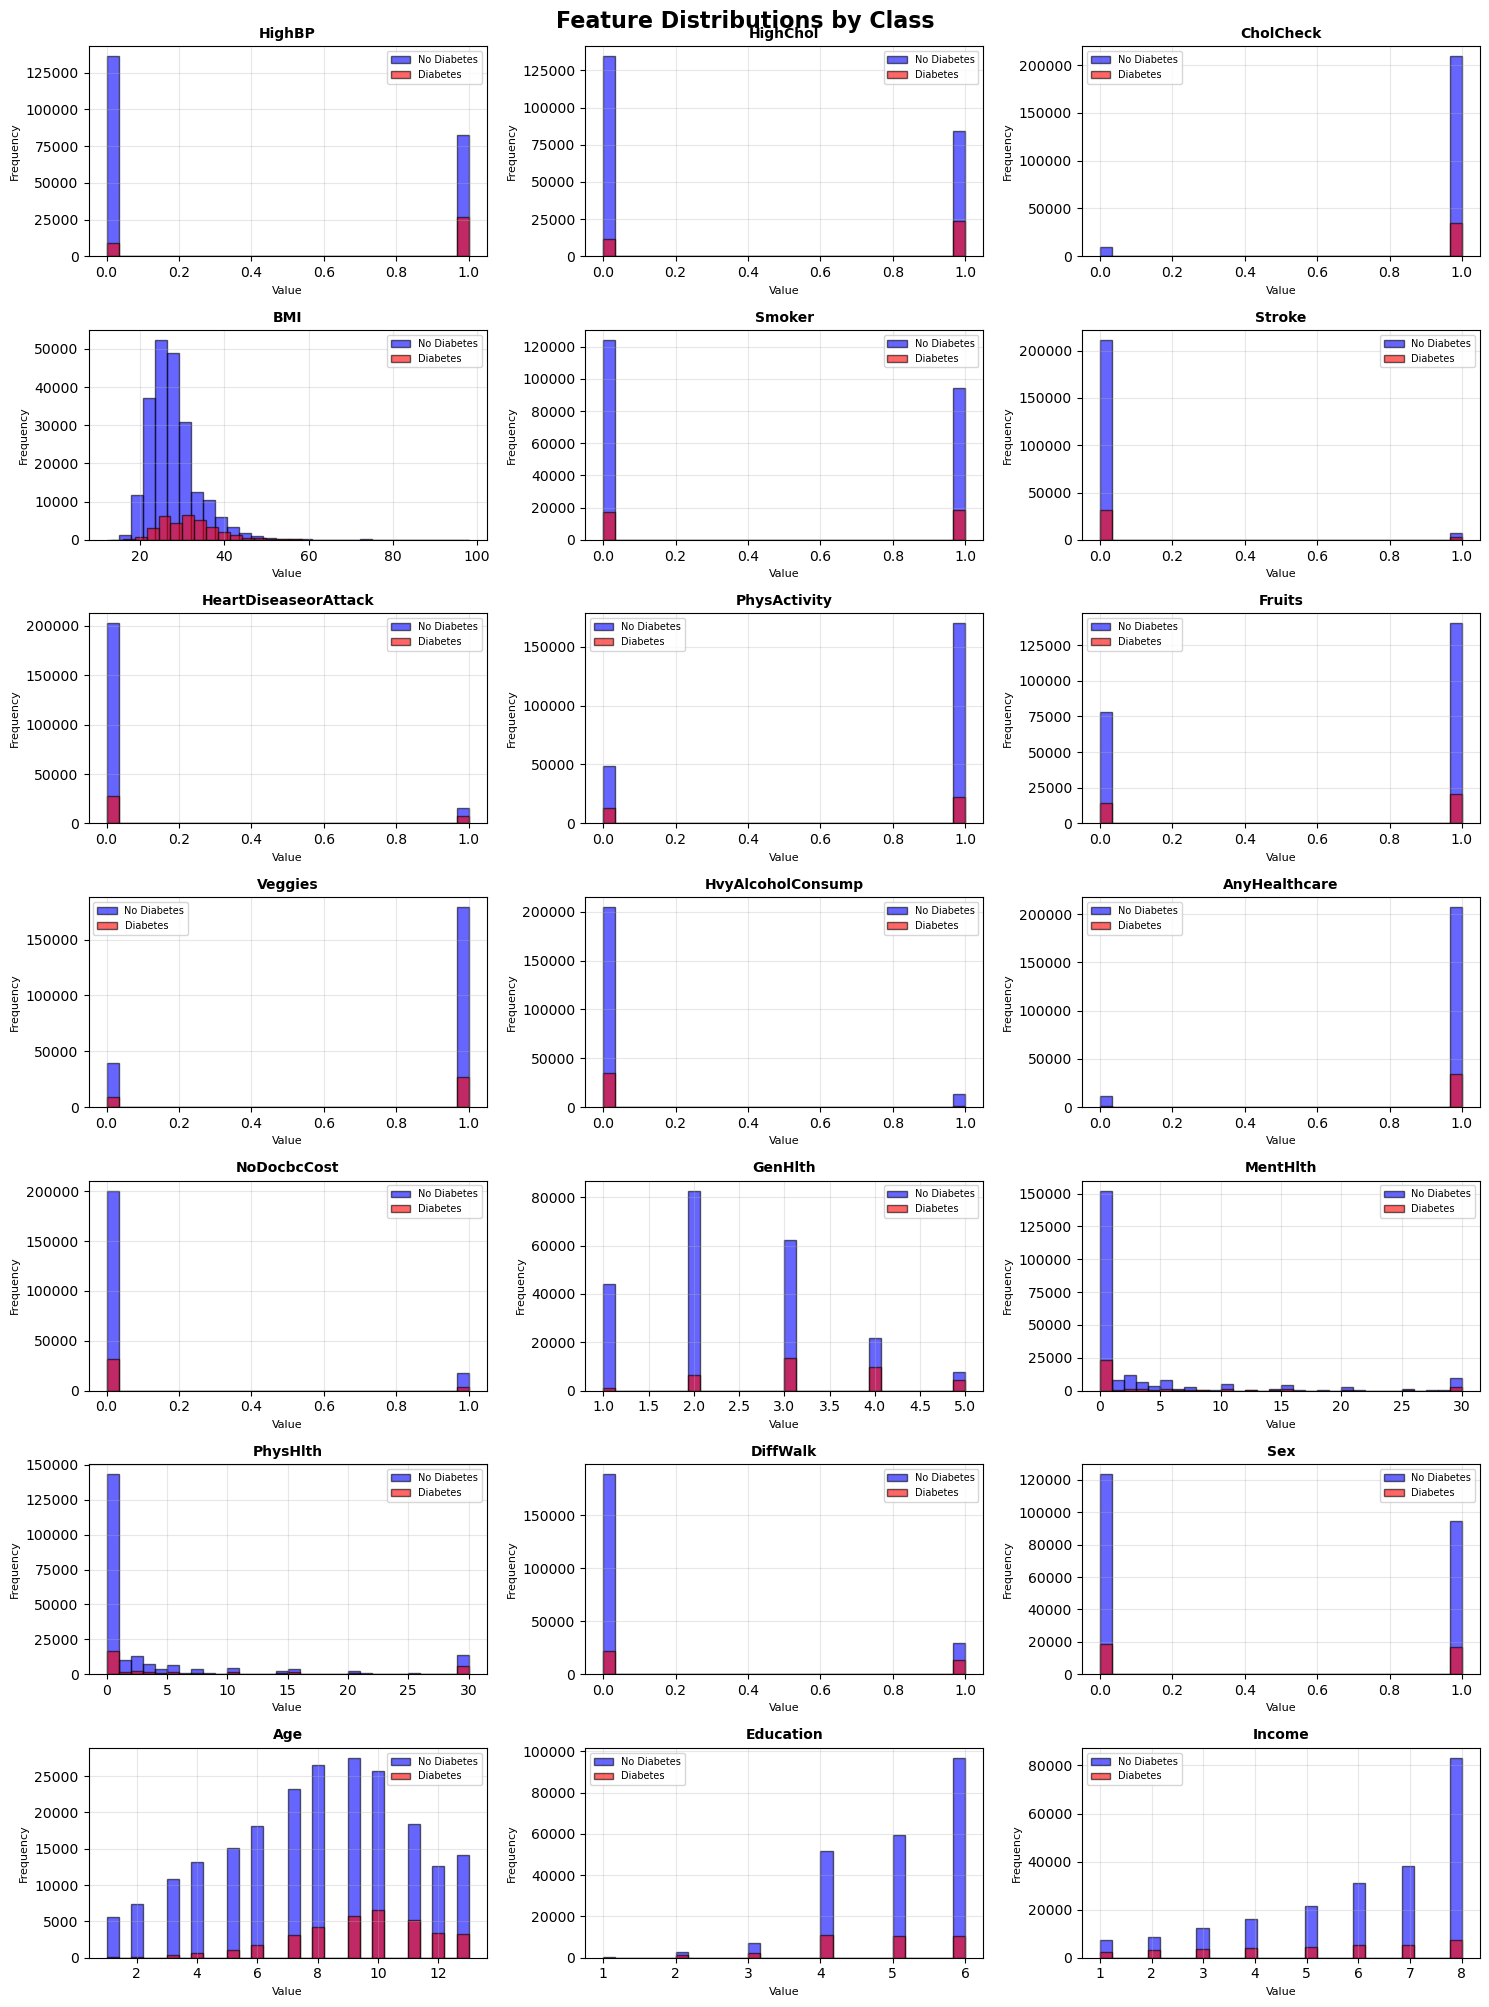

In [5]:
import matplotlib.pyplot as plt

# Compare feature distributions between classes
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(X.columns):
    # No diabetes (class 0)
    axes[idx].hist(X[y==0][col], bins=30, alpha=0.6, 
                   color='blue', label='No Diabetes', edgecolor='black')
    # Diabetes (class 1)
    axes[idx].hist(X[y==1][col], bins=30, alpha=0.6, 
                   color='red', label='Diabetes', edgecolor='black')
    
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=8)
    axes[idx].set_ylabel('Frequency', fontsize=8)
    axes[idx].legend(fontsize=7)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature Distributions by Class', 
             fontsize=16, y=1.001, fontweight='bold')
plt.show()

Total diabetes cases: 35346
Percentage of dataset: 13.93%


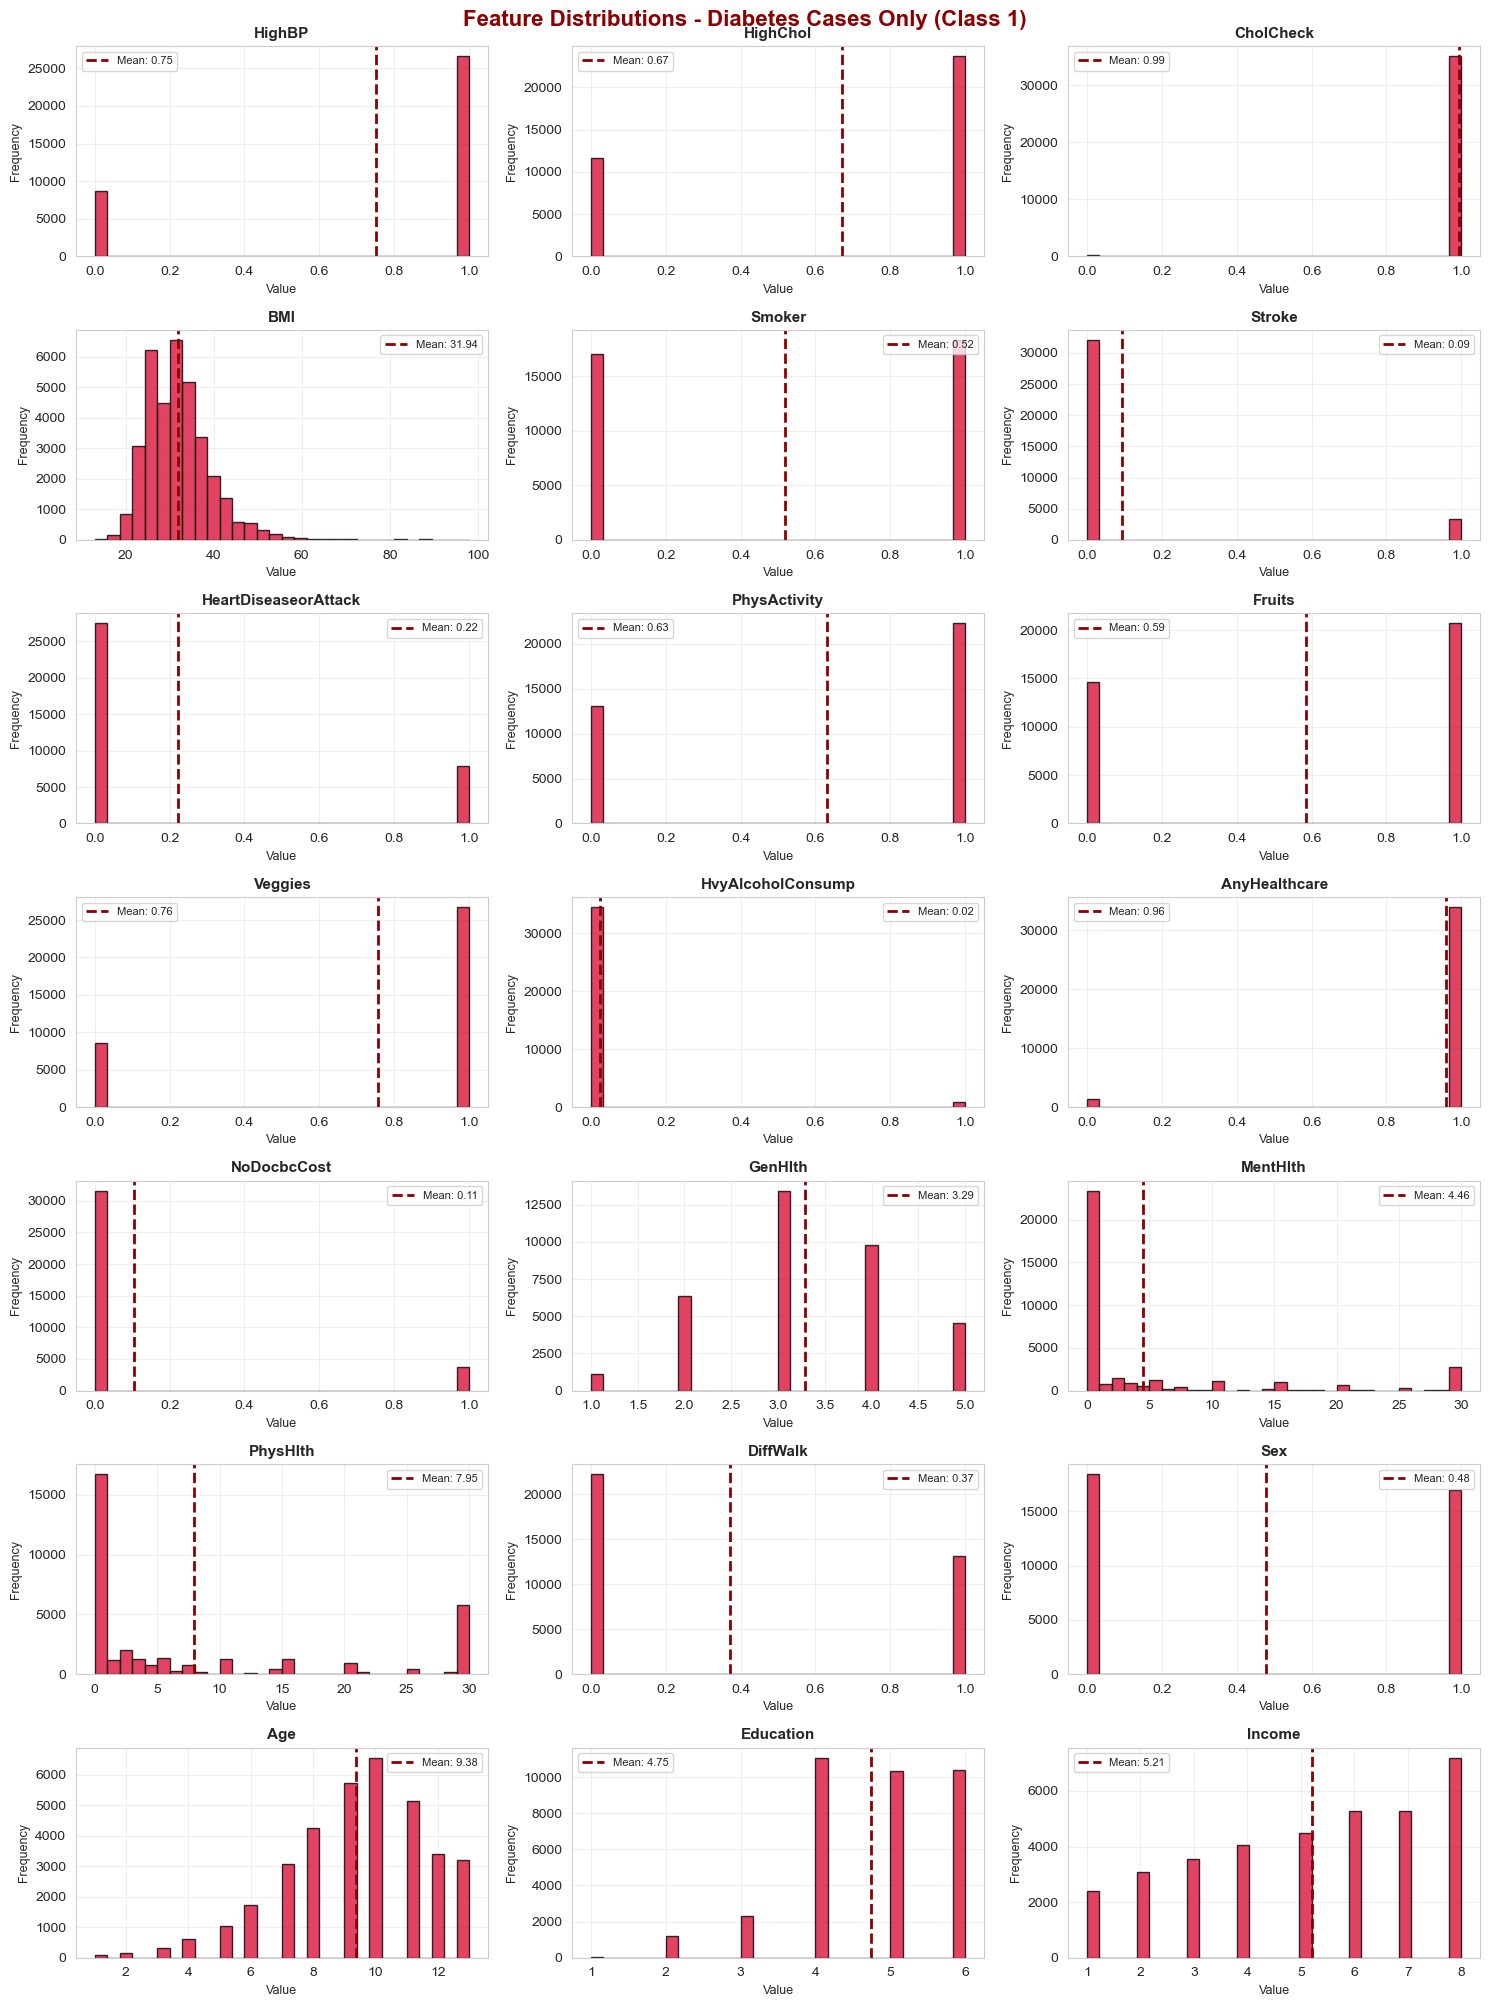

In [13]:
#Plot the distribution of all features for only diabetes 

# Filter for only diabetes cases (y == 1)
X_diabetes = X[y == 1]

print(f"Total diabetes cases: {len(X_diabetes)}")
print(f"Percentage of dataset: {len(X_diabetes)/len(X)*100:.2f}%")

# Plot distributions for all features (diabetes only)
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(X.columns):
    axes[idx].hist(X_diabetes[col], bins=30, alpha=0.8, 
                   color='crimson', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = X_diabetes[col].mean()
    axes[idx].axvline(mean_val, color='darkred', 
                      linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Feature Distributions - Diabetes Cases Only (Class 1)', 
             fontsize=16, y=1.001, fontweight='bold', color='darkred')
plt.show()

Total non-diabetes cases: 218334
Percentage of dataset: 86.07%


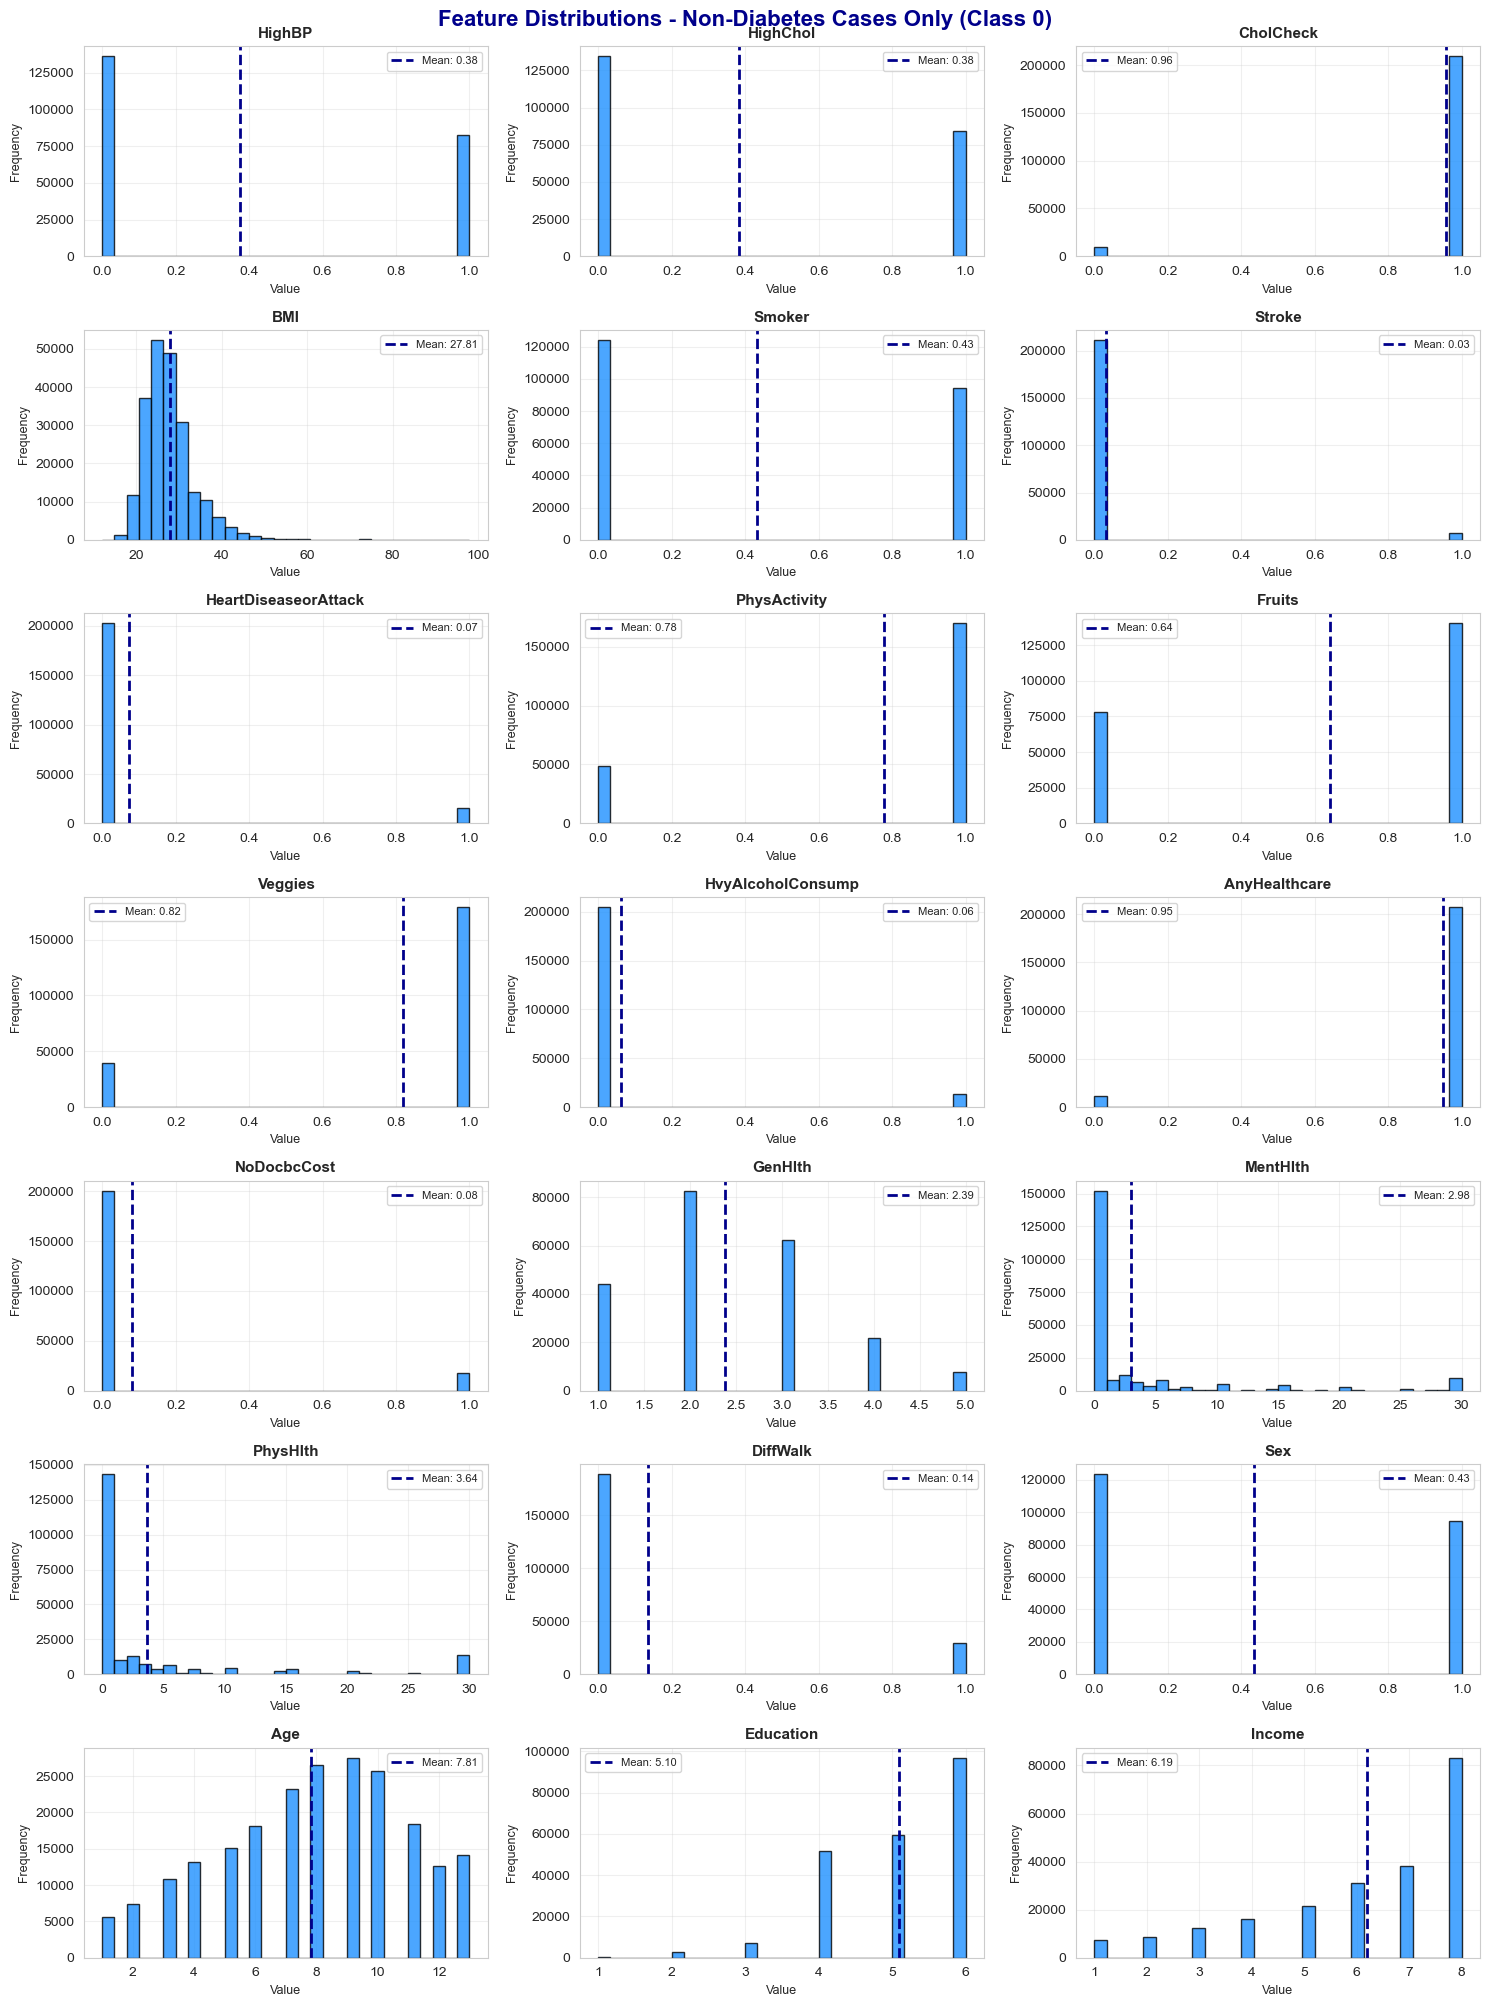

In [15]:
#Plot the distribution of all features for only non diabetes 
# Filter for only non-diabetes cases (y == 0)
X_no_diabetes = X[y == 0]

print(f"Total non-diabetes cases: {len(X_no_diabetes)}")
print(f"Percentage of dataset: {len(X_no_diabetes)/len(X)*100:.2f}%")

# Plot distributions for all features (non-diabetes only)
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(X.columns):
    axes[idx].hist(X_no_diabetes[col], bins=30, alpha=0.8, 
                   color='dodgerblue', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = X_no_diabetes[col].mean()
    axes[idx].axvline(mean_val, color='darkblue', 
                      linestyle='--', linewidth=2, 
                      label=f'Mean: {mean_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Feature Distributions - Non-Diabetes Cases Only (Class 0)', 
             fontsize=16, y=1.001, fontweight='bold', color='darkblue')
plt.show()

Most of our predictors are significantly skewed with only a few showing signs of normality, most of our binary features show class imbalance. Features like high bloodpressure, high chelesterol and smoking show inverse distributions between diabetes and non diabetes groups. 

It is also celar that the mean value for many features is different between the two groups. For example people without diabeteis tend to have higher educaion and income and tend to be younger. 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Create PCA pipeline (following Week 8 pattern)
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(X)

# Get the PCA model to check variance explained
pca_model = pca_scaled.named_steps['pca']
print(f"Variance explained by PC1: {pca_model.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca_model.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total variance explained: {sum(pca_model.explained_variance_ratio_)*100:.2f}%")


Variance explained by PC1: 16.71%
Variance explained by PC2: 8.40%
Total variance explained: 25.11%


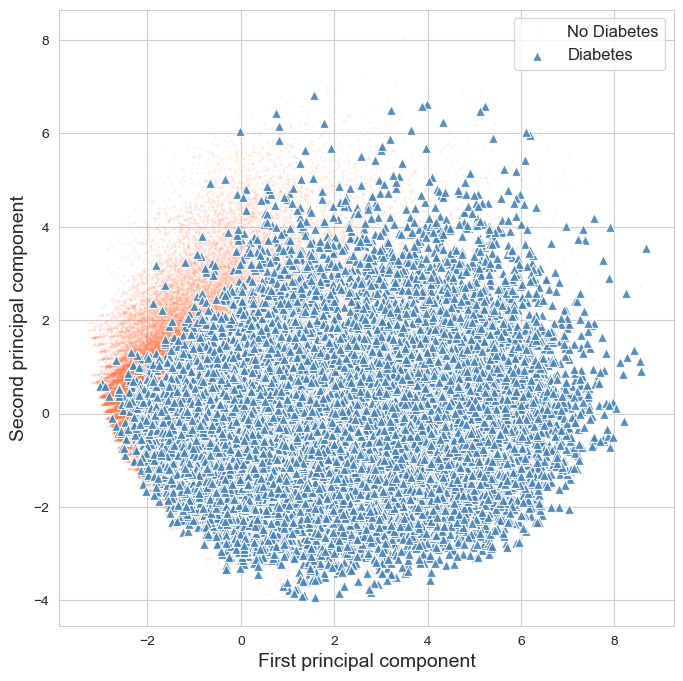

In [30]:
plt.figure(figsize = (8, 8))

# No Diabetes: very transparent background
plt.scatter(X_pca_scaled[y==0, 0], X_pca_scaled[y==0, 1],
            marker = 'o', alpha=0.1, s=3, 
            label = 'No Diabetes', c='coral', edgecolors='none')

# Diabetes: clear, prominent markers
plt.scatter(X_pca_scaled[y==1, 0], X_pca_scaled[y==1, 1],
            marker = '^', alpha=0.9, s=50, 
            label = 'Diabetes', c='steelblue', 
            edgecolors='white', linewidths=0.8)

plt.gca().set_aspect("equal")
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.show()

Difficult to see distincion so Ill add another plot showing densitity side by side

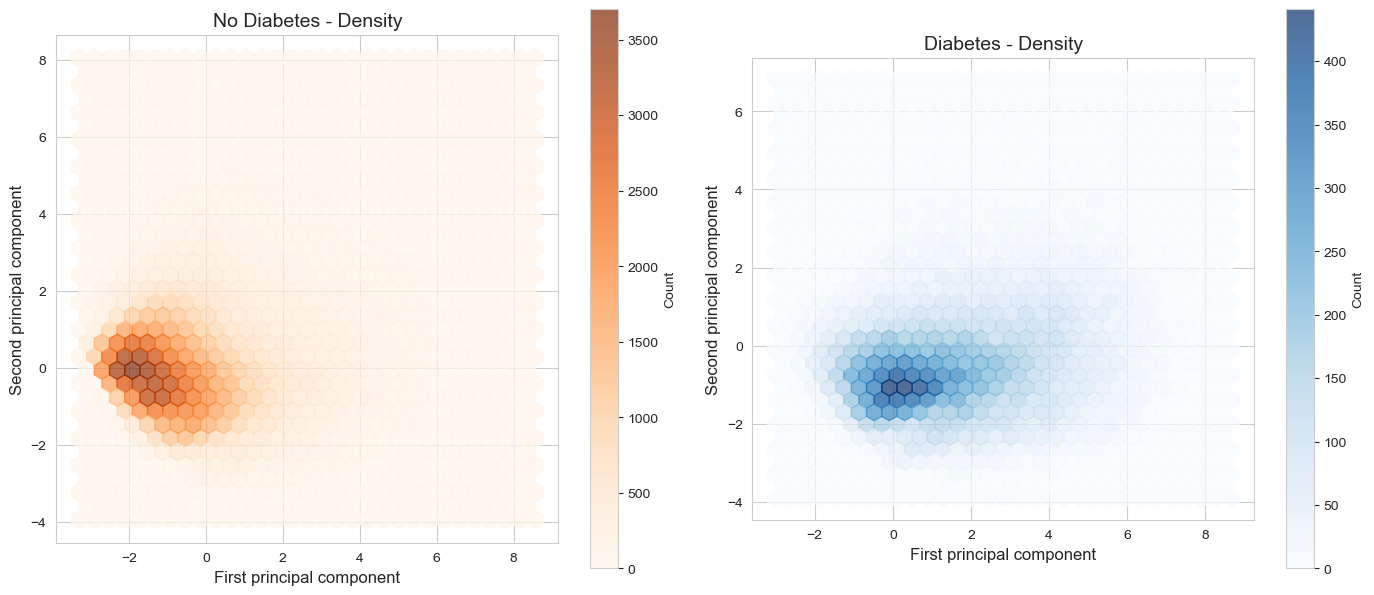

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Hexbin for No Diabetes
im0 = axes[0].hexbin(X_pca_scaled[y==0, 0], X_pca_scaled[y==0, 1], 
                      gridsize=30, cmap='Oranges', alpha=0.7)
axes[0].set_aspect("equal")
axes[0].set_xlabel("First principal component", fontsize=12)
axes[0].set_ylabel("Second principal component", fontsize=12)
axes[0].set_title("No Diabetes - Density", fontsize=14)
plt.colorbar(im0, ax=axes[0], label='Count')

# Right: Hexbin for Diabetes
im1 = axes[1].hexbin(X_pca_scaled[y==1, 0], X_pca_scaled[y==1, 1], 
                      gridsize=30, cmap='Blues', alpha=0.7)
axes[1].set_aspect("equal")
axes[1].set_xlabel("First principal component", fontsize=12)
axes[1].set_ylabel("Second principal component", fontsize=12)
axes[1].set_title("Diabetes - Density", fontsize=14)
plt.colorbar(im1, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

The two plot displays that both the diabedies and non-diabedies groupd take up similar regiouns in the 2D PCA space. While the two components explain ~25% of the varuation they dont provide great seppearation between classes. 

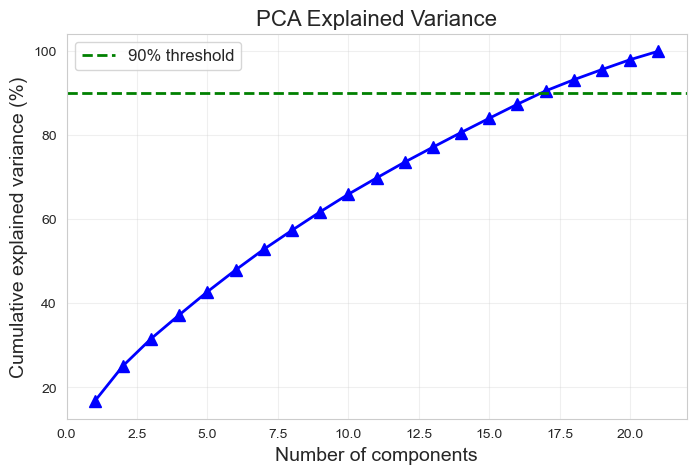

Components needed for 90% variance: 17
Dimensionality reduction: 21 → 17 features


In [33]:
# Make another plot of explained variance (%) in PCA
# Fit PCA with all components
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X)
pca = pca_scaled.named_steps['pca']

# Calculate cumulative variance
cumsum_var = np.cumsum(pca.explained_variance_ratio_ * 100)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'b^-', linewidth=2, markersize=8)
plt.axhline(y=90, color='green', linestyle='--', linewidth=2, label='90% threshold')
plt.xlabel("Number of components", fontsize = 14)
plt.ylabel("Cumulative explained variance (%)", fontsize = 14)
plt.title("PCA Explained Variance", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Answer the threshold question
n_90 = np.argmax(cumsum_var >= 90) + 1
print(f"Components needed for 90% variance: {n_90}")
print(f"Dimensionality reduction: {len(cumsum_var)} → {n_90} features")

Based on the PCA explained variance plot, approximately 17-18 components are 
required to capture 90% of the total variance in the dataset. The first two 
components explain only ~25% of the variance, 
indicating that variance is distributed across many dimensions rather than 
concentrated in a few dominant patterns.

This suggests that the features in this diabetes dataset have low redundancy 
and capture relivant information contributing unique info about the persons likleyhood to have diabetes.

The substantial overlap observed in the 2D PCA projection between diabetes and 
non-diabetes groups shows that linear dimensionality reduction with  
two components is not good enough to sepperate classes. 

#### Question 1-2:
Use different clustering algorithms to cluster the data: K-Means, DBSCAN, Agglomerative clustering, Gaussian Mixture. For each algorithm, tune the parameters for a reasonable outcome, then document your tuning procedure.

Pay attention to the sizes of the clusters created. Inspect the outcome, discuss any resulting clusters are meaningful.

#### Quesetion 1-3:
Evaluate your results with the ground truth label (0 vs. 1) using the two scores: [Normalized Mutual Information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and [Adjust Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html ). Discuss how well did you do in previous question.

#### Question 1-4:
Supervised learning with imbalanced data:
We are using the target variable here. Split the data in train and test set first.

Utilize Random Forest Classifier and another self-selected classification methods, compare the performance on test set, interpret the results in terms of AUC and precision.

Tune the parameters for Random Forest Classifier, does changing the `class-weight` to `balanced` help? Discuss your results and findings.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




# Split data and stratify on diabetes binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [17]:
from sklearn.tree import DecisionTreeClassifier

# 1. Random Forest (default parameters)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
rf_auc = roc_auc_score(y_test, y_proba_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

print("="*50)
print("RANDOM FOREST (Default Parameters)")
print("="*50)
print(f"AUC Score: {rf_auc:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print()

# 2. Decision Tree (default parameters)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Metrics
dt_auc = roc_auc_score(y_test, y_proba_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)

print("DECISION TREE (Default Parameters)")
print(f"AUC Score: {dt_auc:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")


RANDOM FOREST (Default Parameters)
AUC Score: 0.7948
Precision: 0.4880
Recall: 0.1791

DECISION TREE (Default Parameters)
AUC Score: 0.6015
Precision: 0.2976
Recall: 0.3324


Interpret results 

In [16]:
from sklearn.model_selection import GridSearchCV

# ============================================
# 1. RANDOM FOREST with class_weight='balanced'
# ============================================
print("="*60)
print("PART 1: Random Forest with class_weight='balanced'")
print("="*60)

# Grid search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    rf_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
print(f"\nBest Random Forest Parameters: {rf_grid.best_params_}")

# Test with best parameters
y_pred_rf_tuned = rf_grid.best_estimator_.predict(X_test)
y_proba_rf_tuned = rf_grid.best_estimator_.predict_proba(X_test)[:, 1]

rf_tuned_auc = roc_auc_score(y_test, y_proba_rf_tuned)
rf_tuned_precision = precision_score(y_test, y_pred_rf_tuned)
rf_tuned_recall = recall_score(y_test, y_pred_rf_tuned)

print(f"\nRandom Forest (Tuned + class_weight='balanced'):")
print(f"  AUC Score: {rf_tuned_auc:.4f}")
print(f"  Precision: {rf_tuned_precision:.4f}")
print(f"  Recall: {rf_tuned_recall:.4f}")

print("Default RF vs Tuned RF with class_weight='balanced'")
print(f"Default RF:              AUC={rf_auc:.4f}, Precision={rf_precision:.4f}, Recall={rf_recall:.4f}")
print(f"Tuned RF (balanced):     AUC={rf_tuned_auc:.4f}, Precision={rf_tuned_precision:.4f}, Recall={rf_tuned_recall:.4f}")

PART 1: Random Forest with class_weight='balanced'
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/riccimason99/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest (Tuned + class_weight='balanced'):
  AUC Score: 0.8227
  Precision: 0.3120
  Recall: 0.7688
Default RF vs Tuned RF with class_weight='balanced'
Default RF:              AUC=0.7948, Precision=0.4880, Recall=0.1791
Tuned RF (balanced):     AUC=0.8227, Precision=0.3120, Recall=0.7688


The results display that hyper parameter tuning and the inclusion of class_weight='balanced' makes a difference in model performance. This is likely because the original model did not address the issue of non-balanced dataset. while the percision fell slightly there was an improvment in AUC and Recall. 

### Data for part 2 in this assignment (image classification using CNN):
* URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
* On Kaggle Notebook, you can add the data set by searching the above URL
* The goal of this part is to provide a practice with CNN modeling.

In [ ]:
# On Kaggle Notebook, after adding the data, you can import the data directory as follows
train_dir=("../input/vegetable-image-dataset/Vegetable Images/train")
valid_dir=("../input/vegetable-image-dataset/Vegetable Images/validation")
test_dir=("../input/vegetable-image-dataset/Vegetable Images/test")

#### Question 2-1:
Examine the dataset, what is the size of each image (how many pixels/channels in each dimension)? Are all the images have the same size?

Describe the dataset directory structure, use coding to count how many images are there in each class for train set, validation set and test set?

Visualize one sample image from each class in train set.

#### Question 2-2:
Build a CNN model with the following:
* Convolution layer with 32 filters of size 3x3, strides of 1, same padding and relu activation function, specify the input_shape
* MaxPooling layer with a pool size of 2
* Convolution layer with 64 filters of size 3x3, strides of 1, same padding and relu activation function
* MaxPooling layer with a pool size of 2
* Flatten layer to flatten the 3 dimensional feature volume
* Dense layer (Fully-connected) with 128 neurons and relu activation function
* Dropout layer with a dropout rate of 25%
* Dense layer (Fully-connected) with 128 neurons and relu activation function
* Final output layer with neuron number the same as class number of the dataset, and softmax activation function

For each layer, how many parameters will be trained? Show your calculation instead of just `model.summary()` only

#### Question 2-3:
Compile your CNN model with `Adam` optimizer, `categorical_crossentropy` as loss, `accuracy` as metrics, and fit with train and validation data. You can control the rest of the parameter with `.fit()` by yourself.
What is the total time for training?

Evaluate the trained model with test set, how is the performance?

What is your observation from this practice, and what you have learnt from this practice?